In [4]:
!pip install nltk pandas matplotlib scikit-learn seaborn statsmodels
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /home/emil/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/emil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/emil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
corpus_names = ["oracc_cams", "oracc_ribo", "oracc_rinap", "oracc_saao"]
# corpus oracc_dcclt has been excluded due to it having no valid translations.
corpus_display_names = {
    "oracc_cams": "Corpus of Ancient Mesopotamian Scholarship",
    "oracc_ribo": "Royal Inscriptions of Babylonia online",
    "oracc_rinap": "Royal Inscriptions of the Neo-Assyrian Period",
    "oracc_saao": "State Archives of Assyria Online"
}

In [6]:
import nltk
tokenized_corpora = {}
for corpus_name in corpus_names:
    with open(f"parsed_dataset/translations_{corpus_name}.txt") as f:
        lines = f.readlines()
        print(f"{corpus_name}: {len(lines)} lines")
        lines = [nltk.word_tokenize(line) for line in lines]
        tokenized_corpora[corpus_name] = lines

oracc_cams: 19370 lines
oracc_ribo: 1027 lines
oracc_rinap: 2434 lines
oracc_saao: 40064 lines


## 2

In [7]:
# extract tokens into a flat list for each corpus
flat_token_lists = {}
for corpus_name in corpus_names:
    flat_tokens = []
    for line in tokenized_corpora[corpus_name]:
        flat_tokens.extend(line)
    flat_token_lists[corpus_name] = flat_tokens

for corpus_name in corpus_names:
    num_tokens = len(flat_token_lists[corpus_name])
    print(f"{corpus_name}: {num_tokens} tokens")


oracc_cams: 322766 tokens
oracc_ribo: 50345 tokens
oracc_rinap: 173278 tokens
oracc_saao: 618420 tokens


In [8]:

def is_valid_word(word):
    return word not in [",", ".", ";", ":", "!", "?", "'", '"', "-", "—", "(", ")", "[", "]", "{", "}", "...", "`", "``", "''", "“", "”"]

def setamies(word):
    for char in word:
        if char == ".":
            return True
    return False


In [9]:
stopword_removed_corpora = {}
for corpus_name in corpus_names:
    line = flat_token_lists[corpus_name]
    filtered_line = []
    for word in line:
        if is_valid_word(word) and not setamies(word):
            filtered_line.append(word.lower())
    stopword_removed_corpora[corpus_name] = filtered_line

print(stopword_removed_corpora["oracc_cams"][:50])

['the', 'son', 'of', 'the', 'king', 'of', 'the', 'inhabited', 'world', 'the', 'resplendent', 'one', 'the', 'beloved', 'of', 'mami', 'let', 'me', 'sing', 'of', 'the', 'mighty', 'one', 'the', 'son', 'of', 'enlil', 'ninurta', 'the', 'resplendent', 'one', 'the', 'beloved', 'of', 'mami', 'let', 'me', 'praise', 'the', 'mighty', 'one', 'the', 'god', 'the', 'son', 'of', 'enlil', 'the', 'offspring', 'of']


In [10]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stem_words(words):
    return [stemmer.stem(word) for word in words]

stemmed_corpora = {}
for corpus_name in corpus_names:
    lines = stopword_removed_corpora[corpus_name]
    stemmed_lines = stem_words(lines)
    stemmed_corpora[corpus_name] = stemmed_lines

# test print
print(stemmed_corpora["oracc_cams"][0:5])


['the', 'son', 'of', 'the', 'king']


In [11]:
# calculate total number of tokens in each stemmed corpus
num_stemmed_tokens = {}
for corpus_name in corpus_names:
    num_tokens = len(stemmed_corpora[corpus_name])
    num_stemmed_tokens[corpus_name] = num_tokens
    print(f"{corpus_name}: {num_tokens} stemmed tokens")

oracc_cams: 231762 stemmed tokens
oracc_ribo: 37597 stemmed tokens
oracc_rinap: 129099 stemmed tokens
oracc_saao: 471976 stemmed tokens


In [12]:
from nltk.corpus import wordnet
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def exists_in_wordnet(word):
    return bool(wordnet.synsets(word))


In [13]:
# calculate proportion of tokens that exist in WordNet for each corpus
wordnet_proportions = {}
for corpus_name in corpus_names:
    stemmed_tokens = stemmed_corpora[corpus_name]
    if len(stemmed_tokens) > 0:
        count_in_wordnet = sum(1 for token in stemmed_tokens if exists_in_wordnet(token))
        proportion = count_in_wordnet / len(stemmed_tokens)
        wordnet_proportions[corpus_name] = proportion
        print(f"{corpus_name}: {proportion:.4f} proportion of tokens in WordNet")

oracc_cams: 0.5808 proportion of tokens in WordNet
oracc_ribo: 0.5381 proportion of tokens in WordNet
oracc_rinap: 0.5097 proportion of tokens in WordNet
oracc_saao: 0.5497 proportion of tokens in WordNet


In [14]:
# calculate vocabulary sizes
vocabulary_sizes = {}
for corpus_name in corpus_names:
    unique_tokens = set(stemmed_corpora[corpus_name])
    vocabulary_sizes[corpus_name] = len(unique_tokens)
    print(f"{corpus_name}: vocabulary size: {len(unique_tokens)}")

oracc_cams: vocabulary size: 7875
oracc_ribo: vocabulary size: 2383
oracc_rinap: vocabulary size: 4702
oracc_saao: vocabulary size: 13148


In [15]:
# summarizing findings in a table
import pandas as pd

data = {
    "Corpus": [corpus_display_names[name] for name in corpus_names],
    "Total Tokens": [num_stemmed_tokens[name] for name in corpus_names],
    "Vocabulary Size": [vocabulary_sizes[name] for name in corpus_names],
    "Proportion in WordNet": [wordnet_proportions[name] for name in corpus_names]
}


df = pd.DataFrame(data)
df

,Corpus,Total Tokens,Vocabulary Size,Proportion in WordNet
0,Corpus of Ancient Mesopotamian Scholarship,231762,7875,0.580811
1,Royal Inscriptions of Babylonia online,37597,2383,0.538128
2,Royal Inscriptions of the Neo-Assyrian Period,129099,4702,0.509679
3,State Archives of Assyria Online,471976,13148,0.549733


## 3

In [16]:
# load BBC dataset with Pandas
bbc_df = pd.read_csv("dataset/bbc_news.csv")
bbc_df.head()
# extract title and description columns
bbc_texts = bbc_df["title"].tolist() + bbc_df["description"].tolist()
print(bbc_texts[:5])

['Ukraine: Angry Zelensky vows to punish Russian atrocities', 'War in Ukraine: Taking cover in a town under attack', "Ukraine war 'catastrophic for global food'", "Manchester Arena bombing: Saffie Roussos's parents on hearing the truth", 'Ukraine conflict: Oil price soars to highest level since 2008']


In [17]:
tokenized_bbc = [nltk.word_tokenize(text) for text in bbc_texts]
print(tokenized_bbc[:2])

[['Ukraine', ':', 'Angry', 'Zelensky', 'vows', 'to', 'punish', 'Russian', 'atrocities'], ['War', 'in', 'Ukraine', ':', 'Taking', 'cover', 'in', 'a', 'town', 'under', 'attack']]


In [18]:
# flatten the tokenized list
flat_bbc_tokens = []
for line in tokenized_bbc:
    flat_bbc_tokens.extend(line)
print(flat_bbc_tokens[:50])

['Ukraine', ':', 'Angry', 'Zelensky', 'vows', 'to', 'punish', 'Russian', 'atrocities', 'War', 'in', 'Ukraine', ':', 'Taking', 'cover', 'in', 'a', 'town', 'under', 'attack', 'Ukraine', 'war', "'catastrophic", 'for', 'global', 'food', "'", 'Manchester', 'Arena', 'bombing', ':', 'Saffie', 'Roussos', "'s", 'parents', 'on', 'hearing', 'the', 'truth', 'Ukraine', 'conflict', ':', 'Oil', 'price', 'soars', 'to', 'highest', 'level', 'since', '2008']


In [19]:
# remove special characters and lowercase
filtered_bbc_tokens = []
for word in flat_bbc_tokens:
    if is_valid_word(word):
        filtered_bbc_tokens.append(word.lower())
print(filtered_bbc_tokens[:50])

['ukraine', 'angry', 'zelensky', 'vows', 'to', 'punish', 'russian', 'atrocities', 'war', 'in', 'ukraine', 'taking', 'cover', 'in', 'a', 'town', 'under', 'attack', 'ukraine', 'war', "'catastrophic", 'for', 'global', 'food', 'manchester', 'arena', 'bombing', 'saffie', 'roussos', "'s", 'parents', 'on', 'hearing', 'the', 'truth', 'ukraine', 'conflict', 'oil', 'price', 'soars', 'to', 'highest', 'level', 'since', '2008', 'ukraine', 'war', 'pm', 'to', 'hold']


In [20]:
stemmed_bbc_tokens = stem_words(filtered_bbc_tokens)
print(stemmed_bbc_tokens[:50])

['ukrain', 'angri', 'zelenski', 'vow', 'to', 'punish', 'russian', 'atroc', 'war', 'in', 'ukrain', 'take', 'cover', 'in', 'a', 'town', 'under', 'attack', 'ukrain', 'war', "'catastroph", 'for', 'global', 'food', 'manchest', 'arena', 'bomb', 'saffi', 'rousso', "'s", 'parent', 'on', 'hear', 'the', 'truth', 'ukrain', 'conflict', 'oil', 'price', 'soar', 'to', 'highest', 'level', 'sinc', '2008', 'ukrain', 'war', 'pm', 'to', 'hold']


In [21]:
# calculate total number of tokens in BBC dataset
num_bbc_tokens = len(stemmed_bbc_tokens)
print(f"BBC Dataset: {num_bbc_tokens} tokens")

BBC Dataset: 1165809 tokens


In [22]:
# calculate proportion of tokens that exist in WordNet
count_in_wordnet_bbc = sum(1 for token in stemmed_bbc_tokens if exists_in_wordnet(token))
proportion_bbc = count_in_wordnet_bbc / len(stemmed_bbc_tokens)
print(f"BBC Dataset: {proportion_bbc:.4f} proportion of tokens in WordNet")

BBC Dataset: 0.6004 proportion of tokens in WordNet


In [23]:
# calculate vocabulary size of BBC dataset
unique_bbc_tokens = set(stemmed_bbc_tokens)
vocabulary_size_bbc = len(unique_bbc_tokens)
print(f"BBC Dataset: vocabulary size: {vocabulary_size_bbc}")

BBC Dataset: vocabulary size: 33902


In [24]:
# summarize results in a table
bbc_data = {
    "Corpus": ["BBC News Dataset"],
    "Total Tokens": [num_bbc_tokens],
    "Vocabulary Size": [vocabulary_size_bbc],
    "Proportion in WordNet": [proportion_bbc]
}
bbc_df = pd.DataFrame(bbc_data)
bbc_df

,Corpus,Total Tokens,Vocabulary Size,Proportion in WordNet
0,BBC News Dataset,1165809,33902,0.600399


Results from two previous stages summarized in a table:

In [25]:
overall_df = pd.concat([df, bbc_df])
# reset index for cleaner look
overall_df.reset_index(drop=True, inplace=True)
overall_df

,Corpus,Total Tokens,Vocabulary Size,Proportion in WordNet
0,Corpus of Ancient Mesopotamian Scholarship,231762,7875,0.580811
1,Royal Inscriptions of Babylonia online,37597,2383,0.538128
2,Royal Inscriptions of the Neo-Assyrian Period,129099,4702,0.509679
3,State Archives of Assyria Online,471976,13148,0.549733
4,BBC News Dataset,1165809,33902,0.600399


## 4

In [26]:
corpora = {
    "oracc_cams": stemmed_corpora["oracc_cams"],
    "oracc_ribo": stemmed_corpora["oracc_ribo"],
    "oracc_rinap": stemmed_corpora["oracc_rinap"],
    "oracc_saao": stemmed_corpora["oracc_saao"],
    "bbc": stemmed_bbc_tokens
}


In [27]:
percentages = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]

In [28]:
# evaluate the vocabulcary size when only a certain percentage of the tokens are considered
def evaluate_vocabulary_size(corpus, percentage):
    num_tokens_to_consider = int(len(corpus) * percentage)
    tokens_to_consider = corpus[:num_tokens_to_consider]
    unique_tokens = set(tokens_to_consider)
    return len(unique_tokens)

In [29]:
vocabulary_sizes_results = {}
for corpus_name, corpus in corpora.items():
    vocab_sizes = []
    for percentage in percentages:
        vocab_size = evaluate_vocabulary_size(corpus, percentage)
        vocab_sizes.append(vocab_size)
    vocabulary_sizes_results[corpus_name] = vocab_sizes
    print(f"Vocabulary sizes for {corpus_name}: {vocab_sizes}")

Vocabulary sizes for oracc_cams: [1337, 2138, 3099, 3504, 3869, 4552, 5159, 5492, 5802, 5936, 6171, 6352, 6609, 7046, 7149, 7306, 7439, 7557]
Vocabulary sizes for oracc_ribo: [571, 886, 1160, 1292, 1347, 1434, 1477, 1536, 1572, 1612, 1631, 1679, 1811, 1951, 2038, 2091, 2152, 2207]
Vocabulary sizes for oracc_rinap: [1177, 1733, 2253, 2401, 2588, 2654, 2881, 3026, 3071, 3180, 3212, 3290, 3477, 3610, 3824, 4063, 4189, 4498]
Vocabulary sizes for oracc_saao: [1994, 3381, 4017, 4161, 4432, 5319, 6335, 7407, 7607, 7840, 8204, 8642, 10049, 10444, 11314, 11733, 12026, 12370]
Vocabulary sizes for bbc: [8249, 12047, 15043, 17746, 20150, 21730, 23216, 24256, 25201, 26069, 26840, 27653, 28436, 29246, 30022, 30826, 31603, 32346]


In [30]:
def heaps_law(n, k=100, beta=0.3):
    return k * (n ** beta)

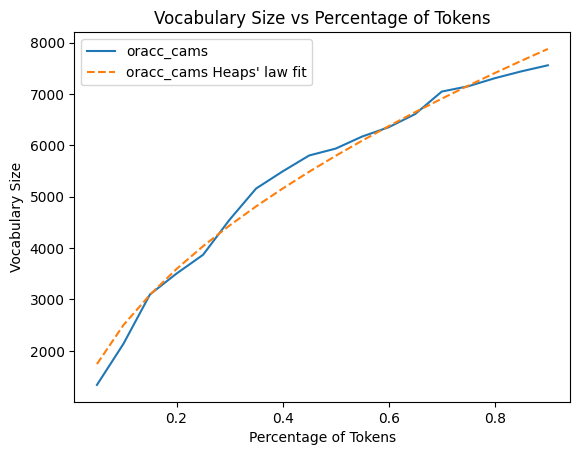

oracc_cams: Heaps' law fit parameters: k=13.20, beta=0.5218, Pearson correlation=0.9930


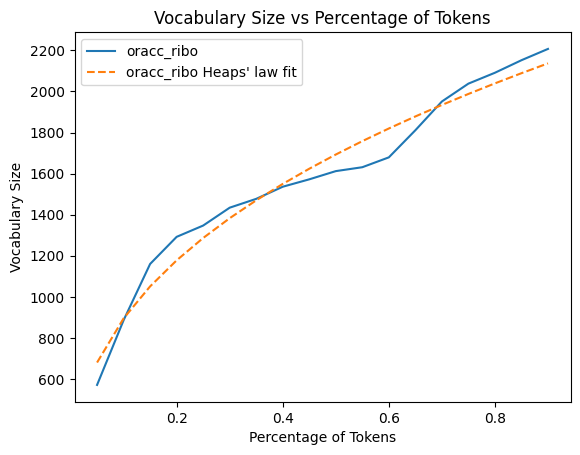

oracc_ribo: Heaps' law fit parameters: k=34.33, beta=0.3961, Pearson correlation=0.9833


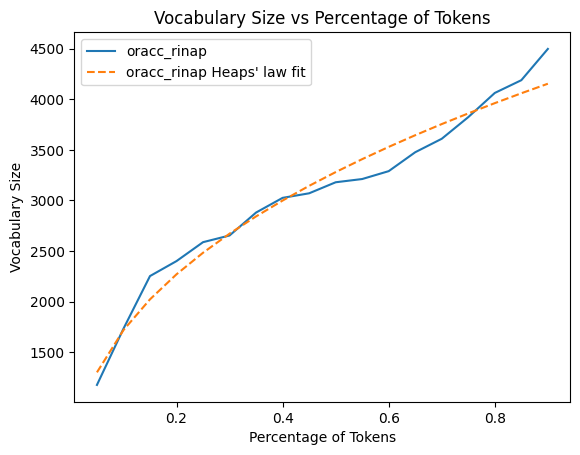

oracc_rinap: Heaps' law fit parameters: k=38.40, beta=0.4016, Pearson correlation=0.9834


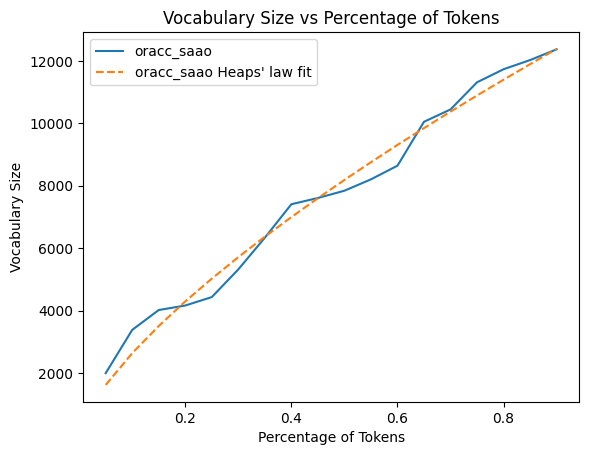

oracc_saao: Heaps' law fit parameters: k=1.35, beta=0.7043, Pearson correlation=0.9922


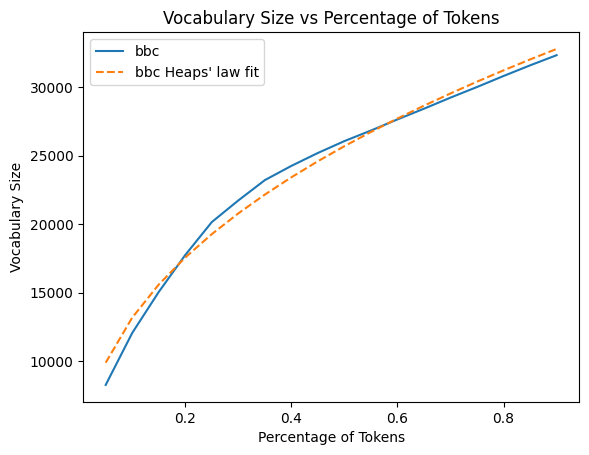

bbc: Heaps' law fit parameters: k=103.47, beta=0.4154, Pearson correlation=0.9946


In [31]:
# graphing the vocabulary sizes against percentages
# also plot Heaps' law curve for comparison
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import pearsonr

k = 100
beta = 0.3

for corpus_name, vocab_sizes in vocabulary_sizes_results.items():
    # fit Heaps' law curve
    heaps_law_fit = curve_fit(heaps_law, [p * len(corpora[corpus_name]) for p in percentages], vocab_sizes, p0=[k, beta])
    fitted_k, fitted_beta = heaps_law_fit[0]
    fitted_vocab_sizes = [heaps_law(p * len(corpora[corpus_name]), fitted_k, fitted_beta) for p in percentages]

    # calculate Pearson correlation coefficient
    correlation, _ = pearsonr(vocab_sizes, fitted_vocab_sizes)

    plt.plot(percentages, vocab_sizes, label=corpus_name)
    plt.plot(percentages, fitted_vocab_sizes, linestyle='--', label=f"{corpus_name} Heaps' law fit")

    plt.xlabel("Percentage of Tokens")
    plt.ylabel("Vocabulary Size")
    plt.title("Vocabulary Size vs Percentage of Tokens")
    plt.legend()
    plt.show()
    print(f"{corpus_name}: Heaps' law fit parameters: k={fitted_k:.2f}, beta={fitted_beta:.4f}, Pearson correlation={correlation:.4f}")

From these results we can see that all of the explored corpora have strong Pearson correlation when vocabulary size is fitted with the percentage of total tokens. Of all the corpora, BBC corpus has most the significant correlation, which can also be observed to have nearly perfect fit with Heaps' law.

## 5

In [32]:
corpuses = {
    "oracc_cams": stemmed_corpora["oracc_cams"],
    "oracc_ribo": stemmed_corpora["oracc_ribo"],
    "oracc_rinap": stemmed_corpora["oracc_rinap"],
    "oracc_saao": stemmed_corpora["oracc_saao"],
    "bbc": stemmed_bbc_tokens
}

In [33]:
from nltk.probability import FreqDist

def calculate_word_frequencies(corpus):
    freq_dist = FreqDist(corpus)
    return freq_dist

In [34]:
freq_dists = {}
for corpus_name, corpus in corpora.items():
    freq_dist = calculate_word_frequencies(corpus)
    freq_dists[corpus_name] = freq_dist
    print(f"Top 10 words in {corpus_name}: {freq_dist.most_common(10)}")

Top 10 words in oracc_cams: [('the', 18361), ('of', 9994), ('and', 6596), ('a', 5684), ('is', 4227), ('will', 4101), ('if', 3938), ('in', 3853), ('it', 3472), ('to', 3317)]
Top 10 words in oracc_ribo: [('the', 3488), ('of', 2436), ('and', 1668), ('god', 857), ('king', 784), ('to', 629), ('hi', 620), ('i', 544), ('in', 508), ('who', 496)]
Top 10 words in oracc_rinap: [('the', 11467), ('of', 8084), ('and', 6434), ('i', 4069), ('my', 2064), ('to', 1920), ('in', 1914), ('king', 1744), ('citi', 1593), ('a', 1533)]
Top 10 words in oracc_saao: [('the', 43752), ('of', 24010), ('and', 13792), ('to', 11921), ('king', 11595), ('my', 9333), ('lord', 9003), ('in', 7893), ('a', 5661), ('i', 5556)]
Top 10 words in bbc: [('the', 53389), ('to', 28814), ('in', 25493), ('of', 23041), ('a', 22902), ("'s", 18442), ('and', 18228), ('for', 11739), ('on', 11061), ('is', 9742)]


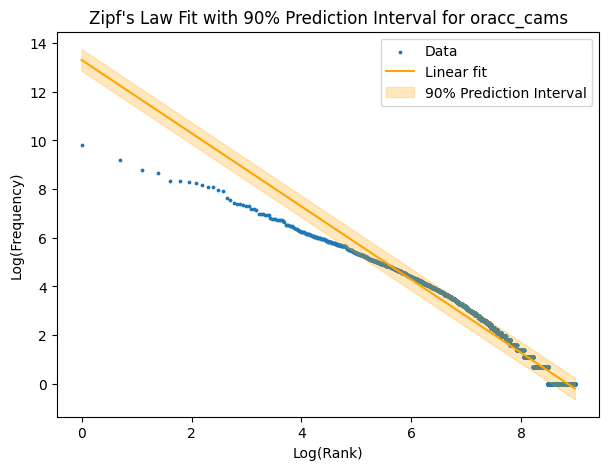

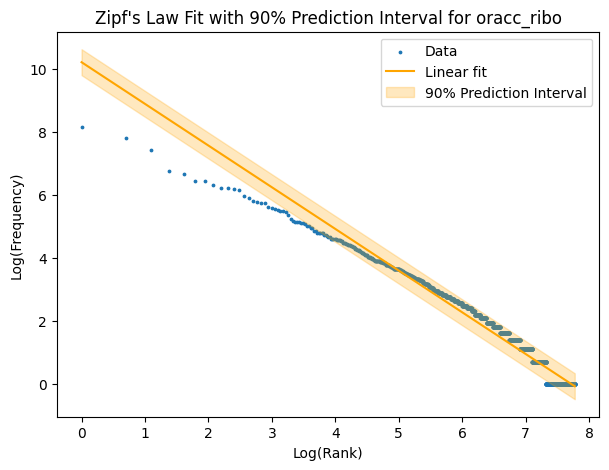

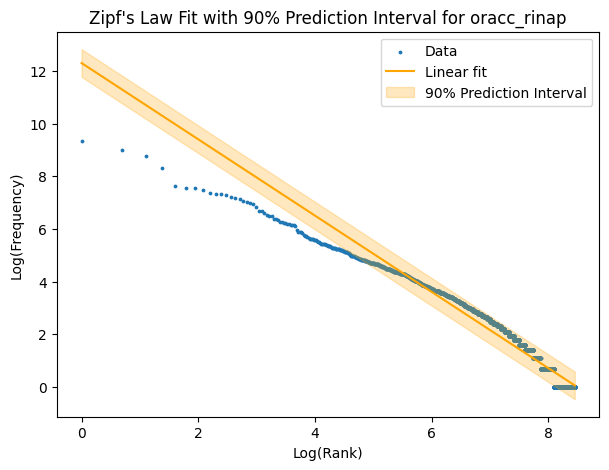

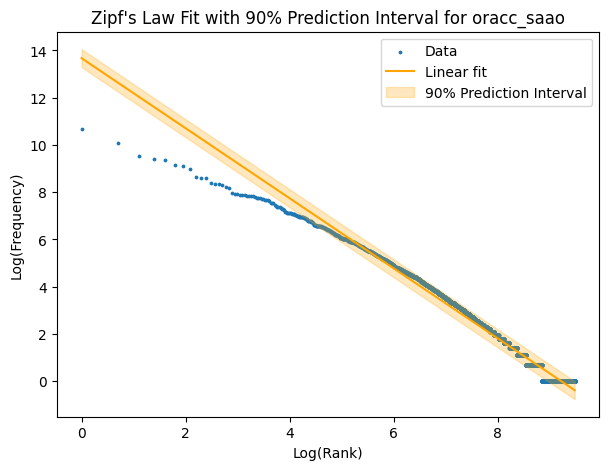

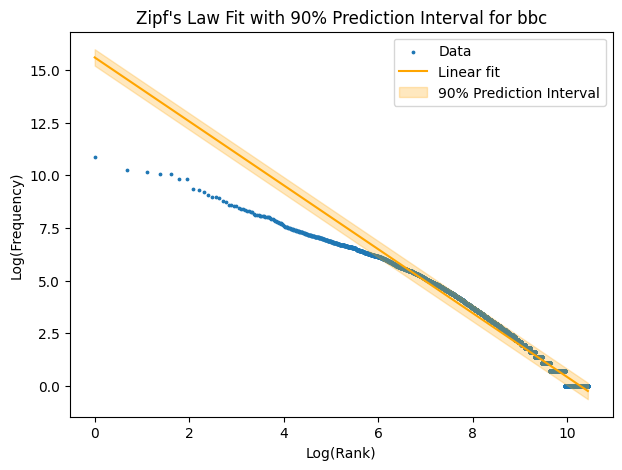

In [35]:
# for each corpus, plot the frequency and rank of words (Zipf's law), and examine whether a linear fit can be accommodated with 90% confidence
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

def get_prediction_intervals(prediction, y_test, test_predictions, pi=.90):
    # from https://medium.com/swlh/ds001-linear-regression-and-confidence-interval-a-hands-on-tutorial-760658632d99
    sum_errs = np.sum((y_test - test_predictions)**2)
    stdev = np.sqrt(1 / (len(y_test) - 2) * sum_errs)
    #get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2)
    z_score = stats.norm.ppf(ppf_lookup)
    interval = z_score * stdev
    #generate prediction interval lower and upper bound cs_24
    lower, upper = prediction - interval, prediction + interval
    return lower, prediction, upper

for corpus_name, freq_dist in freq_dists.items():
    freqs = np.array([freq for word, freq in freq_dist.most_common()])
    ranks = np.arange(1, len(freqs) + 1)

    log_ranks = np.log(ranks)
    log_freqs = np.log(freqs)

    model = LinearRegression()
    model.fit(log_ranks.reshape(-1, 1), log_freqs)
    
    model_line = model.predict(log_ranks.reshape(-1, 1))
    lower, prediction, upper = get_prediction_intervals(model_line, log_freqs, model_line, pi=0.90)

    # plotting
    plt.figure(figsize=(7,5))
    plt.scatter(log_ranks, log_freqs, label='Data', s=3)
    plt.plot(log_ranks, model_line, color='orange', label='Linear fit', zorder=4)
    plt.fill_between(log_ranks, lower, upper, color='orange', alpha=0.25, label='90% Prediction Interval', zorder=3)
    plt.xlabel('Log(Rank)')
    plt.ylabel('Log(Frequency)')
    plt.title(f"Zipf's Law Fit with 90% Prediction Interval for {corpus_name}")
    plt.legend()
    plt.show()


For each corpus, the data points conform to Zipf's law with 90% confidence bound of the linear regression model roughly from between ranks 5 and 6.

## 6

We have created a function to extract the most frequent tokens for each corpus. We can leverage this to find 100 most frequent tokens.

In [36]:
most_frequent_tokens = {}
for corpus_name, freq_dist in freq_dists.items():
    most_common = freq_dist.most_common(100)
    most_frequent_tokens[corpus_name] = [word for word, _ in most_common]
    print(f"Most frequent tokens in {corpus_name}: {most_frequent_tokens[corpus_name]}")

Most frequent tokens in oracc_cams: ['the', 'of', 'and', 'a', 'is', 'will', 'if', 'in', 'it', 'to', 'you', 'he', 'hi', 'on', 'day', "'s", 'ditto', 'for', 'be', 'that', '1', 'not', 'god', 'with', 'are', 'may', 'him', 'man', 'land', 'from', 'king', '2', 'son', 'i', 'mean', 'your', 'at', 'an', 'they', 'or', 'my', '3', 'one', 'month', 'hous', 'as', 'who', 'hand', '00', 'by', '30', 'incant', 'give', '0', 'appear', 'stand', 'there', 'me', '=', 'time', 'like', '20', 'out', 'ha', 'moon', 'anu', 'right', 'up', 'year', 'birth', 'their', '40', 'reciproc', 'becom', 'she', 'star', 'her', 'great', 'take', 'set', 'which', 'place', 'cubit', 'marduk', 'all', 'evil', 'left', 'planet', 'woman', 'templ', 'front', 'citi', 'sign', 'enemi', '10', 'eclips', 'keep', 'befor', 'when', 'have']
Most frequent tokens in oracc_ribo: ['the', 'of', 'and', 'god', 'king', 'to', 'hi', 'i', 'in', 'who', 'it', 'my', 'for', 'a', 'babylon', 'with', 'lord', 'he', 'marduk', 'great', 'had', 'land', 'one', 'may', 'their', 'as', '

Now we can use the Jaccard similarity to compare overlap accross corpora

In [37]:

overlap_results = {}

def jaccard_similarity(list1, list2):
    intersection = len(set(list1).intersection(set(list2)))
    union = len(set(list1).union(set(list2)))

    return intersection / union

for corpus_name, tokens in most_frequent_tokens.items():
    for other_corpus_name, other_tokens in most_frequent_tokens.items():
        if corpus_name != other_corpus_name:
            similarity = jaccard_similarity(tokens, other_tokens)
            overlap_results[(corpus_name, other_corpus_name)] = similarity
            print(f"Jaccard similarity between {corpus_name} and {other_corpus_name}: {similarity:.4f}")

# now we assume

Jaccard similarity between oracc_cams and oracc_ribo: 0.3158
Jaccard similarity between oracc_cams and oracc_rinap: 0.3072
Jaccard similarity between oracc_cams and oracc_saao: 0.4184
Jaccard similarity between oracc_cams and bbc: 0.2658
Jaccard similarity between oracc_ribo and oracc_cams: 0.3158
Jaccard similarity between oracc_ribo and oracc_rinap: 0.4925
Jaccard similarity between oracc_ribo and oracc_saao: 0.3333
Jaccard similarity between oracc_ribo and bbc: 0.2346
Jaccard similarity between oracc_rinap and oracc_cams: 0.3072
Jaccard similarity between oracc_rinap and oracc_ribo: 0.4925
Jaccard similarity between oracc_rinap and oracc_saao: 0.3333
Jaccard similarity between oracc_rinap and bbc: 0.2579
Jaccard similarity between oracc_saao and oracc_cams: 0.4184
Jaccard similarity between oracc_saao and oracc_ribo: 0.3333
Jaccard similarity between oracc_saao and oracc_rinap: 0.3333
Jaccard similarity between oracc_saao and bbc: 0.2579
Jaccard similarity between bbc and oracc_cams

## 7

Next, we will evaluate the similarity between NLTK stopwords list and 100 most frequent tokens from each corpus:

In [38]:
from nltk.corpus import stopwords
nltk_stopwords = set(stopwords.words('english'))

overlap_with_stopwords = {}

for corpus_name, tokens in most_frequent_tokens.items():
    overlap = jaccard_similarity(tokens, nltk_stopwords)
    overlap_with_stopwords[corpus_name] = overlap
    print(f"Jaccard similarity between {corpus_name} most frequent tokens and NLTK stopwords: {overlap:.4f}")

Jaccard similarity between oracc_cams most frequent tokens and NLTK stopwords: 0.1641
Jaccard similarity between oracc_ribo most frequent tokens and NLTK stopwords: 0.1462
Jaccard similarity between oracc_rinap most frequent tokens and NLTK stopwords: 0.1641
Jaccard similarity between oracc_saao most frequent tokens and NLTK stopwords: 0.1920
Jaccard similarity between bbc most frequent tokens and NLTK stopwords: 0.1779


In [39]:
# Next, we will present the results in a 6x6 matrix including comparison with stopwords
import pandas as pd
all_corpora = corpus_names + ["bbc", "nltk_stopwords"]
similarity_matrix = pd.DataFrame(index=all_corpora, columns=all_corpora)

for (corpus_name, other_corpus_name), similarity in overlap_results.items():
    if corpus_name != other_corpus_name:
        similarity_matrix.loc[corpus_name, other_corpus_name] = similarity
        similarity_matrix.loc[other_corpus_name, corpus_name] = similarity  # fill both [i,j] and [j,i]
similarity_matrix.loc["nltk_stopwords", "nltk_stopwords"] = 1.0  # similarity with itself
for corpus_name, overlap in overlap_with_stopwords.items():
    similarity_matrix.loc[corpus_name, "nltk_stopwords"] = overlap
    similarity_matrix.loc["nltk_stopwords", corpus_name] = overlap
similarity_matrix = similarity_matrix.fillna(1.0)
similarity_matrix

/tmp/ipykernel_17900/495778062.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  similarity_matrix = similarity_matrix.fillna(1.0)


,oracc_cams,oracc_ribo,oracc_rinap,oracc_saao,bbc,nltk_stopwords
oracc_cams,1.000000,0.315789,0.307190,0.418440,0.265823,0.164062
oracc_ribo,0.315789,1.000000,0.492537,0.333333,0.234568,0.146154
oracc_rinap,0.307190,0.492537,1.000000,0.333333,0.257862,0.164062
oracc_saao,0.418440,0.333333,0.333333,1.000000,0.257862,0.192000
bbc,0.265823,0.234568,0.257862,0.257862,1.000000,0.177866
nltk_stopwords,0.164062,0.146154,0.164062,0.192000,0.177866,1.000000


## 8

In [ ]:
cleaned_corpora = {}

# we will begin by cleaning up the tokenized corpora, but preserving line structure
for tokenized_corpus_name, corpus in tokenized_corpora.items():
    cleaned_lines = []
    for line in corpus:
        cleaned_line = []
        for word in line:
            if is_valid_word(word) and not setamies(word):
                cleaned_line.append(word.lower())
        cleaned_lines.append(cleaned_line)
    cleaned_corpora[tokenized_corpus_name] = cleaned_lines

# special handling for BBC dataset
cleaned_bbc_lines = []
for line in tokenized_bbc:
    cleaned_line = []
    for word in line:
        if is_valid_word(word) and not setamies(word):
            cleaned_line.append(word.lower())
    cleaned_bbc_lines.append(cleaned_line)
cleaned_corpora["bbc"] = cleaned_bbc_lines

# test print
print(cleaned_corpora["oracc_cams"][:2])
print(cleaned_corpora["bbc"][:2])

[['the', 'son', 'of', 'the', 'king', 'of', 'the', 'inhabited', 'world', 'the', 'resplendent', 'one', 'the', 'beloved', 'of', 'mami', 'let', 'me', 'sing', 'of', 'the', 'mighty', 'one', 'the', 'son', 'of', 'enlil'], ['ninurta', 'the', 'resplendent', 'one', 'the', 'beloved', 'of', 'mami', 'let', 'me', 'praise', 'the', 'mighty', 'one', 'the', 'god', 'the', 'son', 'of', 'enlil', 'the', 'offspring', 'of', 'the', 'ekur', 'the', 'pre-eminent', 'one', 'of', 'the', 'anunnaku', 'the', 'trusted', 'one', 'of', 'the', 'eninnu', 'the', 'irrigator', 'of', 'pens', 'cultivated', 'land', 'city', 'street', 'and', 'city', 'the', 'wave', 'of', 'battle', 'the', 'wave', 'of', 'battle', 'the', 'whirling', 'one', 'the', 'sash', 'of', 'heroism']]
[['ukraine', 'angry', 'zelensky', 'vows', 'to', 'punish', 'russian', 'atrocities'], ['war', 'in', 'ukraine', 'taking', 'cover', 'in', 'a', 'town', 'under', 'attack']]


In [41]:
# next, we'll stem the cleaned corpora
stemmed_corpora = {}
for cleaned_corpus_name, cleaned_corpus in cleaned_corpora.items():
    stemmed_lines = []
    for line in cleaned_corpus:
        stemmed_line = stem_words(line)
        stemmed_lines.append(stemmed_line)
    stemmed_corpora[cleaned_corpus_name] = stemmed_lines

# test print
print(stemmed_corpora["oracc_cams"][:2])
print(stemmed_corpora["bbc"][:2])

[['the', 'son', 'of', 'the', 'king', 'of', 'the', 'inhabit', 'world', 'the', 'resplend', 'one', 'the', 'belov', 'of', 'mami', 'let', 'me', 'sing', 'of', 'the', 'mighti', 'one', 'the', 'son', 'of', 'enlil'], ['ninurta', 'the', 'resplend', 'one', 'the', 'belov', 'of', 'mami', 'let', 'me', 'prais', 'the', 'mighti', 'one', 'the', 'god', 'the', 'son', 'of', 'enlil', 'the', 'offspr', 'of', 'the', 'ekur', 'the', 'pre-emin', 'one', 'of', 'the', 'anunnaku', 'the', 'trust', 'one', 'of', 'the', 'eninnu', 'the', 'irrig', 'of', 'pen', 'cultiv', 'land', 'citi', 'street', 'and', 'citi', 'the', 'wave', 'of', 'battl', 'the', 'wave', 'of', 'battl', 'the', 'whirl', 'one', 'the', 'sash', 'of', 'heroism']]
[['ukrain', 'angri', 'zelenski', 'vow', 'to', 'punish', 'russian', 'atroc'], ['war', 'in', 'ukrain', 'take', 'cover', 'in', 'a', 'town', 'under', 'attack']]


In [42]:
# now we will join each list back to a sentence
joined_corpora = {}
for stemmed_corpus_name, stemmed_corpus in stemmed_corpora.items():
    joined_lines = []
    for line in stemmed_corpus:
        joined_line = " ".join(line)
        joined_lines.append(joined_line)
    joined_corpora[stemmed_corpus_name] = joined_lines

# test print
print(joined_corpora["oracc_cams"][:2])

['the son of the king of the inhabit world the resplend one the belov of mami let me sing of the mighti one the son of enlil', 'ninurta the resplend one the belov of mami let me prais the mighti one the god the son of enlil the offspr of the ekur the pre-emin one of the anunnaku the trust one of the eninnu the irrig of pen cultiv land citi street and citi the wave of battl the wave of battl the whirl one the sash of heroism']


In [43]:
# next, we'll vectorize each sentence in the joined corpora using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorized_corpora = {}
vectorizers = {}
for joined_corpus_name, joined_corpus in joined_corpora.items():
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(joined_corpus)
    vectorized_corpora[joined_corpus_name] = tfidf_matrix
    vectorizers[joined_corpus_name] = vectorizer

# test print
print(vectorized_corpora["oracc_cams"])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 181044 stored elements and shape (19370, 7090)>
  Coords	Values
  (0, 6098)	0.4016472989787113
  (0, 5684)	0.29039265377802903
  (0, 4545)	0.3480585687113198
  (0, 3436)	0.13701434060013915
  (0, 3153)	0.23183499320385625
  (0, 6737)	0.21142273339988968
  (0, 5193)	0.2584971468915402
  (0, 4566)	0.28985058508241535
  (0, 996)	0.2505580188586066
  (0, 3903)	0.2847618917214472
  (0, 3675)	0.17420015179548895
  (0, 3985)	0.15904419042568893
  (0, 5591)	0.23183499320385625
  (0, 4047)	0.23789847842592726
  (0, 2100)	0.2351597986041261
  (1, 6098)	0.4599763565016768
  (1, 5684)	0.07274855064499433
  (1, 4545)	0.313901615285447
  (1, 5193)	0.12951631205244044
  (1, 4566)	0.36306376373534666
  (1, 996)	0.12553852507837712
  (1, 3903)	0.14267588819582913
  (1, 3675)	0.08728050383083517
  (1, 3985)	0.07968682534799544
  (1, 4047)	0.11919564273388712
  :	:
  (19369, 3109)	0.14996410761456658
  (19369, 6100)	0.1325899535793529
  (19369

In [44]:
# now we will extract 100 smallest TF-IDF values for each corpus
smallest_tfidf_tokens = {}
for corpus_name, tfidf_matrix in vectorized_corpora.items():
    vectorizer = vectorizers[corpus_name]
    feature_names = vectorizer.get_feature_names_out()
    # sum TF-IDF scores across all documents to get overall importance
    summed_tfidf = tfidf_matrix.sum(axis=0).A1
    # get indices of 100 smallest TF-IDF scores
    smallest_indices = summed_tfidf.argsort()[:100]
    smallest_tokens = [feature_names[i] for i in smallest_indices]
    smallest_tfidf_tokens[corpus_name] = smallest_tokens

# test print
for corpus_name, tokens in smallest_tfidf_tokens.items():
    print(f"100 smallest TF-IDF tokens in {corpus_name}: {tokens}")

100 smallest TF-IDF tokens in oracc_cams: ['15i', 'unstraight', 'summit', 'dallu', 'šutur', '120', 'šuma', 'kagal', 'kasag', 'mesagunug', 'gener', 'šellebi', 'kalbaya', 'luṣ', 'mandidi', 'šarhi', 'zumbu', 'lilbir', 'šuturu', 'pappaya', 'ušu', 'tabn', 'lumur', 'ṣāhitu', 'mardu', 'sattukki', 'enamh', 'damru', 'qudru', 'plane', 'corn', 'drug', 'pillar', 'recess', 'foment', 'banu', 'mutāqu', 'takkasû', 'kubbušu', 'laqipu', 'nannariya', 'heav', 'wole', 'kurunnu', 'babutu', 'pirʾišu', 'kudurrišu', 'influx', '68', 'pronouc', 'dugud', 'im', 'colon', 'nerulla', 'nerubanda', 'baulk', 'kulbibi', 'hanbi', 'dumuq', 'mukkea', 'šuzubu', 'malachit', 'kiškanû', 'sesame', 'belemnit', 'abasmû', 'aru', 'šimrānu', 'gal', 'lammarabi', 'heg', 'sikila', 'babbara', 'flute', 'azallu', 'emboss', 'cleaner', 'usati', 'liabl', 'mukallim', 'taqišu', 'iliyadaʾ', 'apkallu', 'saggiaya', 'babili', 'nappahu', 'stud', 'finkel', 'elbow', 'sun₇', 'kammantu', 'dabibi', 'imbiya', 'haṣib', '3x600', 'ganba', 'šam₂', 'ṭūru', 'co

In [45]:
# now we will analyze the overlap of each corpus's smallest TF-IDF tokens with each other using Jaccard similarity
tfidf_overlap_results = {}
for corpus_name, tokens in smallest_tfidf_tokens.items():
    for other_corpus_name, other_tokens in smallest_tfidf_tokens.items():
        if corpus_name != other_corpus_name:
            similarity = jaccard_similarity(tokens, other_tokens)
            tfidf_overlap_results[(corpus_name, other_corpus_name)] = similarity
            print(f"Jaccard similarity between {corpus_name} and {other_corpus_name} smallest TF-IDF tokens: {similarity:.4f}")

Jaccard similarity between oracc_cams and oracc_ribo smallest TF-IDF tokens: 0.0000
Jaccard similarity between oracc_cams and oracc_rinap smallest TF-IDF tokens: 0.0000
Jaccard similarity between oracc_cams and oracc_saao smallest TF-IDF tokens: 0.0000
Jaccard similarity between oracc_cams and bbc smallest TF-IDF tokens: 0.0000
Jaccard similarity between oracc_ribo and oracc_cams smallest TF-IDF tokens: 0.0000
Jaccard similarity between oracc_ribo and oracc_rinap smallest TF-IDF tokens: 0.0050
Jaccard similarity between oracc_ribo and oracc_saao smallest TF-IDF tokens: 0.0000
Jaccard similarity between oracc_ribo and bbc smallest TF-IDF tokens: 0.0000
Jaccard similarity between oracc_rinap and oracc_cams smallest TF-IDF tokens: 0.0000
Jaccard similarity between oracc_rinap and oracc_ribo smallest TF-IDF tokens: 0.0050
Jaccard similarity between oracc_rinap and oracc_saao smallest TF-IDF tokens: 0.0000
Jaccard similarity between oracc_rinap and bbc smallest TF-IDF tokens: 0.0000
Jaccard

In [46]:
# next we will inspect the overlap of smallest TF-IDF tokens with NLTK stopwords
overlap_with_stopwords_tfidf = {}
stopwords = set(stopwords.words('english'))
for corpus_name, tokens in smallest_tfidf_tokens.items():
    overlap = jaccard_similarity(tokens, stopwords)
    overlap_with_stopwords_tfidf[corpus_name] = overlap
    print(f"Jaccard similarity between {corpus_name} smallest TF-IDF tokens and NLTK stopwords: {overlap:.4f}")

Jaccard similarity between oracc_cams smallest TF-IDF tokens and NLTK stopwords: 0.0000
Jaccard similarity between oracc_ribo smallest TF-IDF tokens and NLTK stopwords: 0.0000
Jaccard similarity between oracc_rinap smallest TF-IDF tokens and NLTK stopwords: 0.0000
Jaccard similarity between oracc_saao smallest TF-IDF tokens and NLTK stopwords: 0.0000
Jaccard similarity between bbc smallest TF-IDF tokens and NLTK stopwords: 0.0000


In [47]:
# presenting the results in a 6x6 matrix including comparison with stopwords
import pandas as pd
all_corpora = corpus_names + ["bbc", "nltk_stopwords"]
similarity_matrix_tfidf = pd.DataFrame(index=all_corpora, columns=all_corpora)

for (corpus_name, other_corpus_name), similarity in tfidf_overlap_results.items():
    if corpus_name != other_corpus_name:
        similarity_matrix_tfidf.loc[corpus_name, other_corpus_name] = similarity
        similarity_matrix_tfidf.loc[other_corpus_name, corpus_name] = similarity  # fill both [i,j] and [j,i]
similarity_matrix_tfidf.loc["nltk_stopwords", "nltk_stopwords"] = 1.0  # similarity with itself
for corpus_name, overlap in overlap_with_stopwords_tfidf.items():
    similarity_matrix_tfidf.loc[corpus_name, "nltk_stopwords"] = overlap
    similarity_matrix_tfidf.loc["nltk_stopwords", corpus_name] = overlap
similarity_matrix_tfidf = similarity_matrix_tfidf.fillna(1.0)
similarity_matrix_tfidf

/tmp/ipykernel_17900/409875684.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  similarity_matrix_tfidf = similarity_matrix_tfidf.fillna(1.0)


,oracc_cams,oracc_ribo,oracc_rinap,oracc_saao,bbc,nltk_stopwords
oracc_cams,1.0,0.000000,0.000000,0.0,0.0,0.0
oracc_ribo,0.0,1.000000,0.005025,0.0,0.0,0.0
oracc_rinap,0.0,0.005025,1.000000,0.0,0.0,0.0
oracc_saao,0.0,0.000000,0.000000,1.0,0.0,0.0
bbc,0.0,0.000000,0.000000,0.0,1.0,0.0
nltk_stopwords,0.0,0.000000,0.000000,0.0,0.0,1.0


## 9

In [48]:
# defining a helper function to calculate information content of a token
def information_content(token, counts, corpus):
    return float(-np.log10(counts[token] / len(corpus)))

In [49]:
from collections import Counter

information_contents = {}
for corpus_name, corpus in corpora.items():
    ic_values = []
    token_counts = Counter(corpus)
    for token in corpus:
        info_content = information_content(token, token_counts, corpus)
        ic_values.append((token, info_content))

    information_contents[corpus_name] = ic_values

# test print
for corpus_name, ic_values in information_contents.items():
    print(f"Information content values for {corpus_name}: {ic_values[:10]}")

Information content values for oracc_cams: [('the', 1.1011458993699008), ('son', 2.423530797340108), ('of', 1.3653028848679432), ('the', 1.1011458993699008), ('king', 2.4112825382412826), ('of', 1.3653028848679432), ('the', 1.1011458993699008), ('inhabit', 3.762982238646549), ('world', 3.4619522429825675), ('the', 1.1011458993699008)]
Information content values for oracc_ribo: [('itti-marduk-balāṭu', 4.575153192389757), ('king', 1.6808371297053182), ('of', 1.1884759084289187), ('king', 1.6808371297053182), ('favourit', 3.6209106829504316), ('of', 1.1884759084289187), ('the', 1.032576716129227), ('god', 1.6421723704665583), ('son', 2.570831818607114), ('of', 1.1884759084289187)]
Information content values for oracc_rinap: [('preciou', 3.362734851231065), ('scion', 4.207832891245322), ('of', 1.2032965733939989), ('baltil', 3.6057728999173593), ('aššur', 2.2933575086774844), ('belov', 3.768500197415059), ('of', 1.2032965733939989), ('the', 1.0514730657293043), ('god', 1.9282229749012227),

In [50]:
# next, we'll extract 100 tokens with the highest information content for each corpus
highest_ic_tokens = {}
for corpus_name, ic_values in information_contents.items():
    # sort by information content in descending order
    sorted_ic = sorted(ic_values, key=lambda x: x[1], reverse=True)
    highest_tokens = [token for token, ic in sorted_ic[:100]]
    highest_ic_tokens[corpus_name] = highest_tokens
    print(f"100 highest information content tokens in {corpus_name}: {highest_tokens}")

100 highest information content tokens in oracc_cams: ['pen', 'feroc', 'kusarikku', 'heart-felt', 'assault', 'await', 'conven', 'gugallu', 'speach', 'assent', 'yourelf', 'outroar', 'danc', 'flay', 'nissaba', 'hurabtil', 'inšušinak', 'ekurmah', 'nisur', 'egiškalama', 'esikila', 'bube', 'enimanku', 'arrmour', 'thiev', 'overthrew', 'hammurabi', 'choic', 'rudderless', 'anchorag', 'morun', 'itti-marduk-balaṭu', 'aššur-dayyan-ina-matati', 'broad', 'gladi', 'bel-iqiša', 'happili', 'umman-igaš', 'grovel', 'tammarītu', 'accus', 'bārûtu', 'reapeatedli', 'hidden', 'mete', 'sparingli', 'weir', 'marad', 'granari', 'blasphemi', 'pitfal', 'consumpt', 'anu-aha-ušabši', 'gal2-bi', 'ladder', 'enuma', 'taught', 'crowd', 'crept', 'hyena', 'jackal', 'herd', 'ulay', 'water-skin', 'ale', 'sweet-scent', 'tress', 'profession', 'shield', 'panther', 'cub', 'discard', 'fineri', 'worker', 'coppersmith', 'jewel', 'loath', 'manifest', 'deceas', 'entreati', 'unlimit', 'trapper', 'match', 'girt', 'garment-fring', 'irn

In [51]:
# use Jaccard similarity to analyze overlap of highest information content tokens between corpora
ic_overlap_results = {}
for corpus_name, tokens in highest_ic_tokens.items():
    for other_corpus_name, other_tokens in highest_ic_tokens.items():
        if corpus_name != other_corpus_name:
            similarity = jaccard_similarity(tokens, other_tokens)
            ic_overlap_results[(corpus_name, other_corpus_name)] = similarity
            print(f"Jaccard similarity between {corpus_name} and {other_corpus_name} highest information content tokens: {similarity:.4f}")

Jaccard similarity between oracc_cams and oracc_ribo highest information content tokens: 0.0000
Jaccard similarity between oracc_cams and oracc_rinap highest information content tokens: 0.0000
Jaccard similarity between oracc_cams and oracc_saao highest information content tokens: 0.0000
Jaccard similarity between oracc_cams and bbc highest information content tokens: 0.0000
Jaccard similarity between oracc_ribo and oracc_cams highest information content tokens: 0.0000
Jaccard similarity between oracc_ribo and oracc_rinap highest information content tokens: 0.0000
Jaccard similarity between oracc_ribo and oracc_saao highest information content tokens: 0.0000
Jaccard similarity between oracc_ribo and bbc highest information content tokens: 0.0000
Jaccard similarity between oracc_rinap and oracc_cams highest information content tokens: 0.0000
Jaccard similarity between oracc_rinap and oracc_ribo highest information content tokens: 0.0000
Jaccard similarity between oracc_rinap and oracc_s

In [52]:
# use Jaccard similarity to analyze overlap of highest information content tokens with NLTK stopwords
ic_overlap_with_stopwords = {}
for corpus_name, tokens in highest_ic_tokens.items():
    overlap = jaccard_similarity(tokens, stopwords)
    ic_overlap_with_stopwords[corpus_name] = overlap
    print(f"Jaccard similarity between {corpus_name} highest information content tokens and NLTK stopwords: {overlap:.4f}")

Jaccard similarity between oracc_cams highest information content tokens and NLTK stopwords: 0.0000
Jaccard similarity between oracc_ribo highest information content tokens and NLTK stopwords: 0.0000
Jaccard similarity between oracc_rinap highest information content tokens and NLTK stopwords: 0.0000
Jaccard similarity between oracc_saao highest information content tokens and NLTK stopwords: 0.0000
Jaccard similarity between bbc highest information content tokens and NLTK stopwords: 0.0000


In [53]:
# presenting the results in a 6x6 matrix including comparison with stopwords
import pandas as pd
all_corpora = corpus_names + ["bbc", "nltk_stopwords"]
similarity_matrix_ic = pd.DataFrame(index=all_corpora, columns=all_corpora)

# fill the matrix with Jaccard similarity values
for (corpus_name, other_corpus_name), similarity in ic_overlap_results.items():
    similarity_matrix_ic.loc[corpus_name, other_corpus_name] = similarity

# fill in stopwords similarities
similarity_matrix_ic.loc["nltk_stopwords", "nltk_stopwords"] = 1.0  # similarity with itself
for corpus_name, overlap in ic_overlap_with_stopwords.items():
    similarity_matrix_ic.loc[corpus_name, "nltk_stopwords"] = overlap
    similarity_matrix_ic.loc["nltk_stopwords", corpus_name] = overlap

# fill the diagonal with 1s
for corpus_name in all_corpora:
    similarity_matrix_ic.loc[corpus_name, corpus_name] = 1.0

# display the matrix
similarity_matrix_ic

,oracc_cams,oracc_ribo,oracc_rinap,oracc_saao,bbc,nltk_stopwords
oracc_cams,1.0,0.0,0.0,0.0,0.0,0.0
oracc_ribo,0.0,1.0,0.0,0.0,0.0,0.0
oracc_rinap,0.0,0.0,1.0,0.0,0.0,0.0
oracc_saao,0.0,0.0,0.0,1.0,0.0,0.0
bbc,0.0,0.0,0.0,0.0,1.0,0.0
nltk_stopwords,0.0,0.0,0.0,0.0,0.0,1.0


## 9

We begin by importing the Python module provided by article "A universal information theoretic approach to the identification of stopwords"

In [61]:
from stopwords_filtering.filter_words import run_stopword_statistics, make_stopwords_filter

We run the stopwords statistics for each of our tokenized corpuses, so that we can feed the results into the actual stopwords generation phase.

In [ ]:

# running stopwords statistics for each tokenized corpus
stopwords_statistics = {}
for corpus_name, corpus in cleaned_corpora.items():
    stats_df = run_stopword_statistics(corpus)
    stopwords_statistics[corpus_name] = stats_df
    print(f"Stopwords statistics for {corpus_name}: {stats_df[:10]}")

Stopwords statistics for oracc_cams:              F             I     tfidf          H    H-tilde   H-tilde_std  \
#     0.000669  4.166683e-01  6.253527   6.840325   7.256993  1.561200e-02   
$     0.000091 -9.523810e-04  6.826958   4.392317   4.391365  9.476071e-03   
&     0.000043  7.549517e-15  7.568896   3.321928   3.321928  0.000000e+00   
'm    0.000026  3.333333e-01  9.914451   2.251629   2.584963  0.000000e+00   
's    0.007352  2.374645e-01  3.232744  10.323463  10.560928  1.284001e-02   
've   0.000004  0.000000e+00  9.871481   0.000000   0.000000  0.000000e+00   
*     0.000022 -1.776357e-15  8.262043   2.321928   2.321928  1.332800e-07   
+     0.000013 -1.332268e-15  8.772868   1.584963   1.584963  5.960464e-08   
--    0.000406  2.031915e-01  6.088362   6.341823   6.545014  1.515724e-02   
-2/3  0.000004  0.000000e+00  9.871481   0.000000   0.000000  0.000000e+00   

         N  
#      155  
$       21  
&       10  
'm       6  
's    1704  
've      1  
*        5  


In [90]:
method = 'INFOR' # using the information content filtering method
cutoff_type = 'n' # using number of types cutoff
cutoff_value = 10 # cutoff value from example

stopwords_dataframes = {}
for corpus_name, stats_df in stopwords_statistics.items():
    df = make_stopwords_filter(stats_df, method, cutoff_type, cutoff_value)
    stopwords_dataframes[corpus_name] = df
    print(f"Generated stopwords for {corpus_name}: {df.head()}")

Generated stopwords for oracc_cams:            F-cumsum         S
if         0.016992 -0.194947
birth      0.018799 -0.037452
gives      0.020547 -0.025627
bc         0.021621 -0.025292
scattered  0.022070 -0.013150
Generated stopwords for oracc_ribo:             F-cumsum         S
5           0.002553 -0.185676
for         0.012820 -0.152425
10          0.014682 -0.125370
esarhaddon  0.016278 -0.119642
anew        0.017581 -0.107109
Generated stopwords for oracc_rinap:              F-cumsum         S
sennacherib  0.002060 -0.129371
for          0.007816 -0.107190
at           0.009868 -0.101887
limestone    0.010860 -0.075218
out          0.012603 -0.074969
Generated stopwords for oracc_saao:            F-cumsum         S
servant    0.003740 -0.077101
of         0.054611 -0.068893
if         0.059469 -0.053048
disregard  0.061168 -0.040935
bless      0.062781 -0.036724
Generated stopwords for bbc:        F-cumsum         S
and    0.015643 -0.101269
in     0.037521 -0.083589
to     0.0

In [91]:
# extracting the generated stopwords from dataframes
generated_stopwords = {}
for corpus_name, df in stopwords_dataframes.items():
    # the stopwords are the index of the dataframe
    stopwords_list = df.index.tolist()
    generated_stopwords[corpus_name] = stopwords_list
    print(f"Generated {len(stopwords_list)} stopwords for {corpus_name}: {stopwords_list[:10]}")

Generated 10 stopwords for oracc_cams: ['if', 'birth', 'gives', 'bc', 'scattered', 'because', 'about', '828', 'amidst', 'bite']
Generated 10 stopwords for oracc_ribo: ['5', 'for', '10', 'esarhaddon', 'anew', 'ashurbanipal', 'lands', '15', 'mountain', 'favorite']
Generated 10 stopwords for oracc_rinap: ['sennacherib', 'for', 'at', 'limestone', 'out', 'surrounded', 'lordly', 'kings', 'ancestors', '5']
Generated 10 stopwords for oracc_saao: ['servant', 'of', 'if', 'disregard', 'bless', 'eponym', 'witness', 'health', 'answer', 'litigation']
Generated 10 stopwords for bbc: ['and', 'in', 'to', 'after', 'says', 'for', 'on', 'of', 'with', 'over']


As instructed in the assignment, we will analyze the overlap of identified stopwords with each corpus and NLTK stopwords list.

In [92]:
# analyze the overlap of identified stopwords with each corpus
overlap_of_generated_stopwords = {}
for corpus_name, stopwords_list in generated_stopwords.items():
    corpus_tokens = set(corpora[corpus_name])
    overlap = jaccard_similarity(stopwords_list, corpus_tokens)
    overlap_of_generated_stopwords[corpus_name] = overlap
    print(f"Jaccard similarity between generated stopwords and {corpus_name} tokens: {overlap:.4f}")

Jaccard similarity between generated stopwords and oracc_cams tokens: 0.0009
Jaccard similarity between generated stopwords and oracc_ribo tokens: 0.0029
Jaccard similarity between generated stopwords and oracc_rinap tokens: 0.0011
Jaccard similarity between generated stopwords and oracc_saao tokens: 0.0006
Jaccard similarity between generated stopwords and bbc tokens: 0.0003


In [93]:
# analyze overlap of generated stopwords with NLTK stopwords
stopwords_overlap_with_nltk = {}
for corpus_name, stopwords_list in generated_stopwords.items():
    overlap = jaccard_similarity(stopwords_list, stopwords)
    stopwords_overlap_with_nltk[corpus_name] = overlap
    print(f"Jaccard similarity between generated stopwords for {corpus_name} and NLTK stopwords: {overlap:.4f}")

Jaccard similarity between generated stopwords for oracc_cams and NLTK stopwords: 0.0000
Jaccard similarity between generated stopwords for oracc_ribo and NLTK stopwords: 0.0000
Jaccard similarity between generated stopwords for oracc_rinap and NLTK stopwords: 0.0000
Jaccard similarity between generated stopwords for oracc_saao and NLTK stopwords: 0.0000
Jaccard similarity between generated stopwords for bbc and NLTK stopwords: 0.0000


Next, we will calculate the TF-IDF and information content of each identified stopword with the functions we defined earlier, and present the result.

In [ ]:
# calculate TF-IDF of each identified stopword

tfidf_of_generated_stopwords = {}
for corpus_name, stopwords_list in generated_stopwords.items():
    vectorizer = vectorizers[corpus_name]
    tfidf_matrix = vectorized_corpora[corpus_name]
    feature_names = vectorizer.get_feature_names_out()
    stopword_tfidf_values = {}
    for stopword in stopwords_list:
        if stopword in feature_names:
            index = feature_names.tolist().index(stopword)
            tfidf_value = tfidf_matrix[:, index].mean()
            stopword_tfidf_values[stopword] = float(tfidf_value)
    tfidf_of_generated_stopwords[corpus_name] = stopword_tfidf_values
    print(f"TF-IDF values for generated stopwords in {corpus_name}: {list(stopword_tfidf_values.items())[:10]}")

TF-IDF values for generated stopwords in oracc_cams: [('if', 0.031989355482382915), ('birth', 0.005481562360661181), ('bc', 0.004067179207354323), ('about', 0.0012212806669856667), ('828', 7.212064417106445e-05), ('amidst', 4.112298315166269e-05), ('bite', 8.440892685025809e-05)]
TF-IDF values for generated stopwords in oracc_ribo: [('for', 0.03046065815471882), ('10', 0.007158766497749538), ('esarhaddon', 0.008555692391067897), ('anew', 0.008411748476130633), ('15', 0.00406075858678517), ('mountain', 0.005878895049281963)]
TF-IDF values for generated stopwords in oracc_rinap: [('sennacherib', 0.02010689233324538), ('for', 0.0223192919208952), ('at', 0.01058218168409949), ('out', 0.009442350715384703)]
TF-IDF values for generated stopwords in oracc_saao: [('servant', 0.010265003606923066), ('of', 0.05807223440517602), ('if', 0.010395911363620888), ('disregard', 0.004873223175574929), ('bless', 0.004258307712573367), ('eponym', 0.004113799030835584), ('health', 0.00629370735113275), ('a

In [96]:
# calculate information content of each identified stopword
information_content_of_generated_stopwords = {}
for corpus_name, stopwords_list in generated_stopwords.items():
    token_counts = Counter(corpora[corpus_name])
    ic_values = {}
    for stopword in stopwords_list:
        if stopword in token_counts:
            info_content = information_content(stopword, token_counts, corpora[corpus_name])
            ic_values[stopword] = info_content
    information_content_of_generated_stopwords[corpus_name] = ic_values
    print(f"Information content values for generated stopwords in {corpus_name}: {list(ic_values.items())[:10]}")

Information content values for generated stopwords in oracc_cams: [('if', 1.7697665181724118), ('birth', 2.7428282070082157), ('bc', 2.968842882878775), ('about', 3.4565572110958613), ('828', 5.06401223431053), ('amidst', 5.06401223431053), ('bite', 4.762982238646549)]
Information content values for generated stopwords in oracc_ribo: [('5', 2.592881959350188), ('for', 1.9885658877180017), ('10', 2.7300551523755), ('esarhaddon', 2.797001942006113), ('anew', 2.884957112361243), ('15', 2.94168473681017), ('mountain', 2.893911955014169)]
Information content values for generated stopwords in oracc_rinap: [('sennacherib', 2.6860412416061985), ('for', 2.23993406447669), ('at', 2.6876770043004576), ('out', 2.758740360125903), ('5', 3.081539100552056)]
Information content values for generated stopwords in oracc_saao: [('servant', 2.346560980916046), ('of', 1.2935277552453488), ('if', 2.313515860572437), ('disregard', 2.7675848734972854), ('bless', 2.7585200800901064), ('eponym', 2.9272857163647

In [99]:
# present the TF-IDF and information content of generated stopwords in a table
for corpus_name in corpus_names+["bbc"]:
    stopwords_list = generated_stopwords[corpus_name]
    tfidf_values = tfidf_of_generated_stopwords[corpus_name]
    ic_values = information_content_of_generated_stopwords[corpus_name]
    
    data = {
        "Stopword": stopwords_list,
        "TF-IDF": [tfidf_values.get(word, 0.0) for word in stopwords_list],
        "Information Content": [ic_values.get(word, 0.0) for word in stopwords_list]
    }
    
    df = pd.DataFrame(data)
    print(f"Generated Stopwords Analysis for {corpus_name}:")
    display(df)

Generated Stopwords Analysis for oracc_cams:


,Stopword,TF-IDF,Information Content
0,if,0.031989,1.769767
1,birth,0.005482,2.742828
2,gives,0.000000,0.000000
3,bc,0.004067,2.968843
4,scattered,0.000000,0.000000
5,because,0.000000,0.000000
6,about,0.001221,3.456557
7,828,0.000072,5.064012
8,amidst,0.000041,5.064012
9,bite,0.000084,4.762982


Generated Stopwords Analysis for oracc_ribo:


,Stopword,TF-IDF,Information Content
0,5,0.000000,2.592882
1,for,0.030461,1.988566
2,10,0.007159,2.730055
3,esarhaddon,0.008556,2.797002
4,anew,0.008412,2.884957
5,ashurbanipal,0.000000,0.000000
6,lands,0.000000,0.000000
7,15,0.004061,2.941685
8,mountain,0.005879,2.893912
9,favorite,0.000000,0.000000


Generated Stopwords Analysis for oracc_rinap:


,Stopword,TF-IDF,Information Content
0,sennacherib,0.020107,2.686041
1,for,0.022319,2.239934
2,at,0.010582,2.687677
3,limestone,0.000000,0.000000
4,out,0.009442,2.758740
5,surrounded,0.000000,0.000000
6,lordly,0.000000,0.000000
7,kings,0.000000,0.000000
8,ancestors,0.000000,0.000000
9,5,0.000000,3.081539


Generated Stopwords Analysis for oracc_saao:


,Stopword,TF-IDF,Information Content
0,servant,0.010265,2.346561
1,of,0.058072,1.293528
2,if,0.010396,2.313516
3,disregard,0.004873,2.767585
4,bless,0.004258,2.758520
5,eponym,0.004114,2.927286
6,witness,0.000000,0.000000
7,health,0.006294,2.588629
8,answer,0.002569,3.076225
9,litigation,0.000000,0.000000


Generated Stopwords Analysis for bbc:


,Stopword,TF-IDF,Information Content
0,and,0.024109,1.805888
1,in,0.030407,1.660206
2,to,0.032814,1.607024
3,after,0.013128,2.197689
4,says,0.000000,0.000000
5,for,0.018577,1.996996
6,on,0.017780,2.022833
7,of,0.028454,1.704126
8,with,0.011425,2.263034
9,over,0.008777,2.455861


Relevant metrics for evaluating the usefulness of identified stopwords could be for example the information content or TF-IDF values of the stopwords. These could also be combined into a hybrid metric, that could have a certain weight for each used submetric.